### <b> Aritificial Neural Networks - Binary classification - Author of algorithm: Frank Rosenblatt</b>

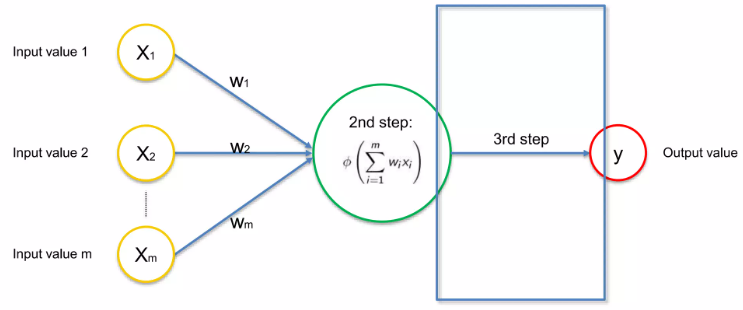
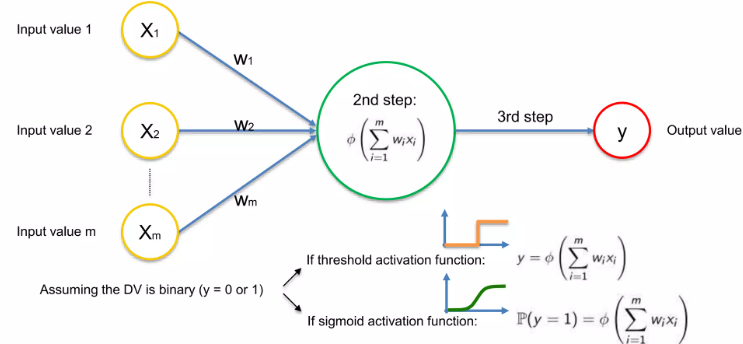
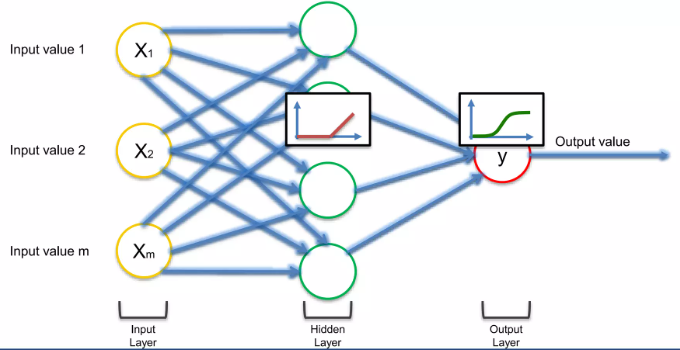
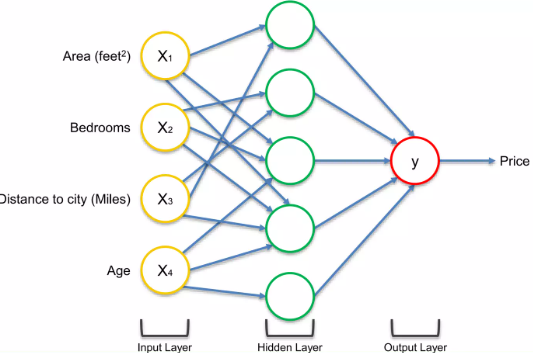
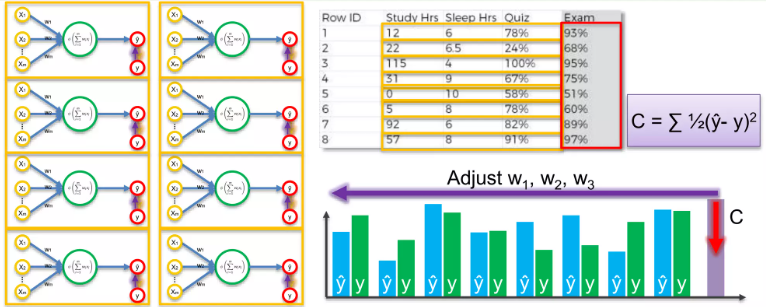
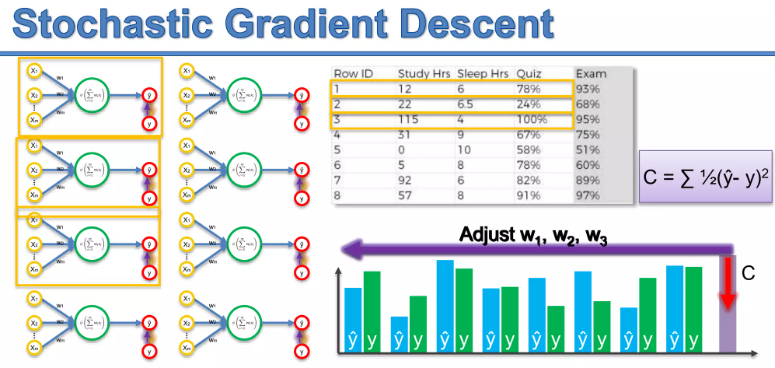
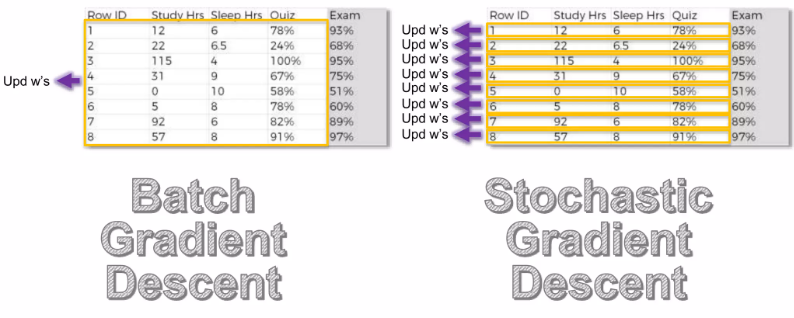
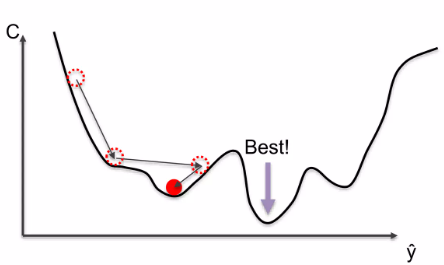
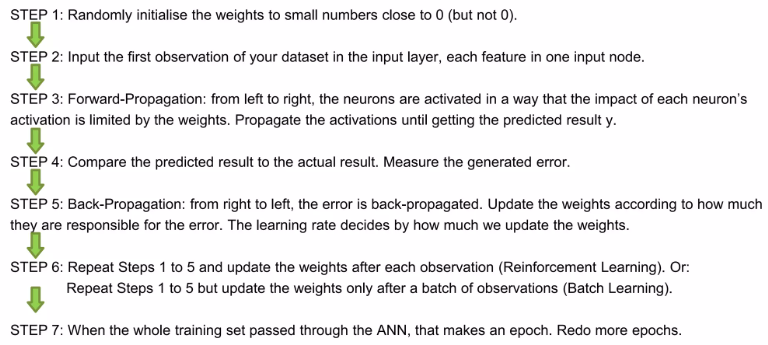
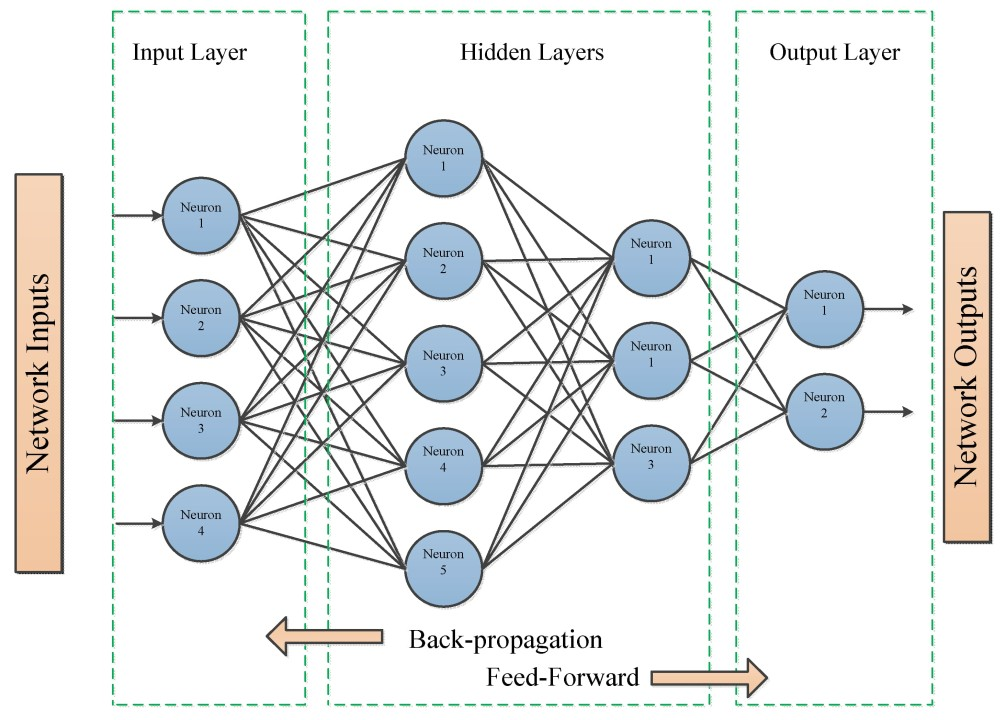
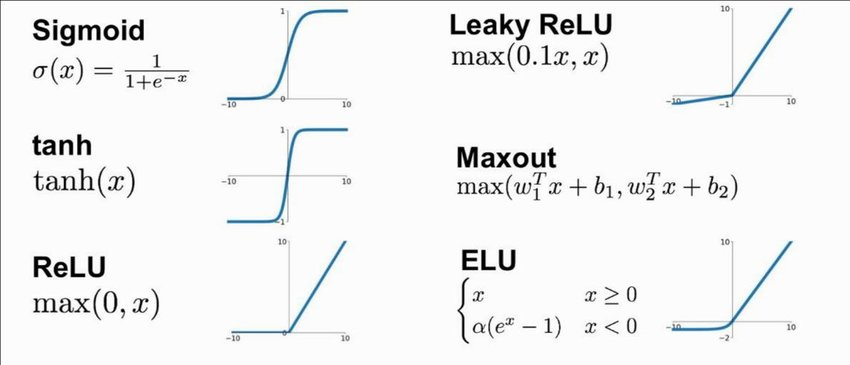

## <b>0. Loading/importing libraries</b>

In [3]:
%pip install --upgrade tensorflow==2.2.0
import tensorflow as tf
tf.__version__

ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.18.0rc0)
ERROR: No matching distribution found for tensorflow==2.2.0


Note: you may need to restart the kernel to use updated packages.


'2.17.0'

In [19]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## <b>1. Data preprocessing</b>

In [5]:
dataset = pd.read_csv("Churn_Modelling.csv")

print(f"Dataset: \n{dataset}\n")

X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

print(f"X: \n{X}\n")
print(f"y: \n{y}\n")

Dataset: 
      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  Is

#### <b>1.1 Encoding categorical data</b>

In [6]:
label_encoder = LabelEncoder()
label_encoder.fit(X[:, 2])
X[:, 2] = label_encoder.transform(X[:, 2])

print(f"X: \n{X}\n")

X: 
[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]



### <b>1.2 One-Hot Encoding of the "Geography" column</b>

In [7]:
column_transformer = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')
column_transformer.fit(X)
X = np.array(column_transformer.transform(X))

print(f"X: \n{X}\n")

X: 
[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]



### <b>1.3 Splitting dataset into training and testing sets</b>

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(f"X_train: \n{X_train}\n")
print(f"X_test: \n{X_test}\n")

X_train: 
[[0.0 0.0 1.0 ... 1 0 163830.64]
 [0.0 1.0 0.0 ... 1 1 57098.0]
 [1.0 0.0 0.0 ... 1 0 185630.76]
 ...
 [1.0 0.0 0.0 ... 1 0 181429.87]
 [0.0 0.0 1.0 ... 1 1 148750.16]
 [0.0 1.0 0.0 ... 1 0 118855.26]]

X_test: 
[[0.0 1.0 0.0 ... 1 1 192852.67]
 [1.0 0.0 0.0 ... 1 0 128702.1]
 [0.0 0.0 1.0 ... 1 1 75732.25]
 ...
 [0.0 0.0 1.0 ... 1 0 141533.19]
 [0.0 1.0 0.0 ... 1 1 11276.48]
 [0.0 1.0 0.0 ... 1 0 192950.6]]



### <b>1.4 Feature scaling of sets</b>

In [9]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

print(f"X_train: \n{X_train}\n")
print(f"X_test: \n{X_test}\n")

X_train: 
[[-1.01460667 -0.5698444   1.74309049 ...  0.64259497 -1.03227043
   1.10643166]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497  0.9687384
  -0.74866447]
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.48533467]
 ...
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   1.41231994]
 [-1.01460667 -0.5698444   1.74309049 ...  0.64259497  0.9687384
   0.84432121]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497 -1.03227043
   0.32472465]]

X_test: 
[[-1.01460667  1.75486502 -0.57369368 ...  0.64259497  0.9687384
   1.61085707]
 [ 0.98560362 -0.5698444  -0.57369368 ...  0.64259497 -1.03227043
   0.49587037]
 [-1.01460667 -0.5698444   1.74309049 ...  0.64259497  0.9687384
  -0.42478674]
 ...
 [-1.01460667 -0.5698444   1.74309049 ...  0.64259497 -1.03227043
   0.71888467]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497  0.9687384
  -1.54507805]
 [-1.01460667  1.75486502 -0.57369368 ...  0.64259497 -1.03227043
   1.61255917]]



## <b>2. Creating and fitting Ariticial Neural Network model</b>

### <b>2.1 Building the artificial neural network</b>

In [12]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))    # Input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))    # Second hidden layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # Output layer

### <b> 2.2 Training the ANN</b>

In [14]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5798 - loss: 0.6884
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.7937 - loss: 0.4913
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.7997 - loss: 0.4542
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.8090 - loss: 0.4358
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.8176 - loss: 0.4179
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.8162 - loss: 0.4242
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.8142 - loss: 0.4293
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.8277 - loss: 0.4117
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8273 - loss: 0.4021
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.8224 - loss: 0.4135
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.8250 - loss: 0.4109
Epoch 12/100
250/250 ━━

## <b> 4. Evaluating the model</b>

### <b>4.1 Predicting custom instance</b>

<i>Customer data:</i>

<b>Geography:</b> France

<b>Credit score:</b> 600

<b>Gender:</b> Male

<b>Age:</b> 40 years old

<b>Tenure:</b> 3 years

<b>Balance:</b> 6000 [$]

<b>Number of products:</b> 2

<b>Does this customer have a credit card:</b> Yes

<b>Is this customer an Active Member?</b> Yes

<b>Estimated salary:</b> 50000 [$]

Should we say goodbye to that customer?

In [18]:
prediction = ann.predict(standard_scaler.transform(
    [
        [1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]
    ]
)) > 0.5

print(f"Prediction: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Prediction: [[False]]


### <b>4.2 Predicting test set results</b>

In [22]:
y_predicted = ann.predict(X_test) > 0.5
print(np.concatenate((y_predicted.reshape(len(y_predicted), 1), y_test.reshape(len(y_test), 1)), 1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [27]:
confusion_matrix_result = confusion_matrix(y_true = y_test, y_pred = y_predicted)

print(f"Confusion matrix: \n{confusion_matrix_result}\n")

accuracy_score_result = accuracy_score(y_true = y_test, y_pred = y_predicted)

print(f"Accuracy score: \n{accuracy_score_result}")

Confusion matrix: 
[[1514   81]
 [ 201  204]]

Accuracy score: 
0.859
